In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import DenseVector

# Crear la sesión de Spark
spark = SparkSession.builder.getOrCreate()

# Leer los datos
datos = spark.read.csv("data/iris.csv", inferSchema="true", header="true")

# Seleccionar las columnas relevantes
regression_data = datos.select("sepal_length", "sepal_width")

# Combinar características en una columna de vectores
assembler = VectorAssembler(inputCols=["sepal_length"], outputCol="features")
regression_data = assembler.transform(regression_data)

# Mostrar los primeros registros
regression_data.show()


+------------+-----------+--------+
|sepal_length|sepal_width|features|
+------------+-----------+--------+
|         5.1|        3.5|   [5.1]|
|         4.9|        3.0|   [4.9]|
|         4.7|        3.2|   [4.7]|
|         4.6|        3.1|   [4.6]|
|         5.0|        3.6|   [5.0]|
|         5.4|        3.9|   [5.4]|
|         4.6|        3.4|   [4.6]|
|         5.0|        3.4|   [5.0]|
|         4.4|        2.9|   [4.4]|
|         4.9|        3.1|   [4.9]|
|         5.4|        3.7|   [5.4]|
|         4.8|        3.4|   [4.8]|
|         4.8|        3.0|   [4.8]|
|         4.3|        3.0|   [4.3]|
|         5.8|        4.0|   [5.8]|
|         5.7|        4.4|   [5.7]|
|         5.4|        3.9|   [5.4]|
|         5.1|        3.5|   [5.1]|
|         5.7|        3.8|   [5.7]|
|         5.1|        3.8|   [5.1]|
+------------+-----------+--------+
only showing top 20 rows



In [2]:
# Inicializar y ajustar el modelo de regresión lineal
lr = LinearRegression(featuresCol="features", labelCol="sepal_width")
lr_model = lr.fit(regression_data)

# Realizar predicciones
predictions = lr_model.transform(regression_data)

# Mostrar las predicciones
predictions.select("sepal_length", "sepal_width", "prediction").show()

+------------+-----------+------------------+
|sepal_length|sepal_width|        prediction|
+------------+-----------+------------------+
|         5.1|        3.5|3.1033343664866946|
|         4.9|        3.0| 3.115711326079527|
|         4.7|        3.2| 3.128088285672359|
|         4.6|        3.1|3.1342767654687753|
|         5.0|        3.6| 3.109522846283111|
|         5.4|        3.9| 3.084768927097446|
|         4.6|        3.4|3.1342767654687753|
|         5.0|        3.4| 3.109522846283111|
|         4.4|        2.9| 3.146653725061608|
|         4.9|        3.1| 3.115711326079527|
|         5.4|        3.7| 3.084768927097446|
|         4.8|        3.4| 3.121899805875943|
|         4.8|        3.0| 3.121899805875943|
|         4.3|        3.0|3.1528422048580236|
|         5.8|        4.0|3.0600150079117814|
|         5.7|        4.4|3.0662034877081976|
|         5.4|        3.9| 3.084768927097446|
|         5.1|        3.5|3.1033343664866946|
|         5.7|        3.8|3.066203

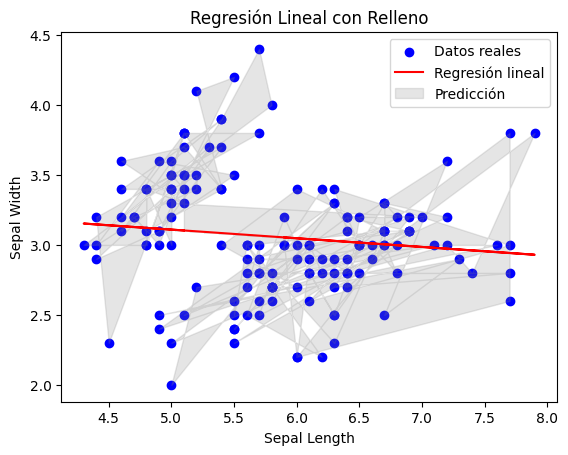

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supongamos que 'regression_data' es un DataFrame de Spark
# Convertir los resultados a un DataFrame de Pandas para la visualización
predictions_pd = predictions.select("sepal_length", "sepal_width", "prediction").toPandas()

# Visualizar los datos y la línea de regresión
fig, ax = plt.subplots()

# Dibujar puntos de datos
ax.scatter(predictions_pd["sepal_length"], predictions_pd["sepal_width"], label="Datos reales", color='blue')

# Dibujar la línea de regresión
ax.plot(predictions_pd["sepal_length"], predictions_pd["prediction"], label="Regresión lineal", color='red')

# Rellenar entre la línea de regresión y los datos reales
ax.fill_between(predictions_pd["sepal_length"], predictions_pd["sepal_width"], predictions_pd["prediction"], color='gray', alpha=0.2, label='Predicción')

# Etiquetas y leyenda
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Regresión Lineal con Relleno')
ax.legend()

# Mostrar el gráfico
plt.show()

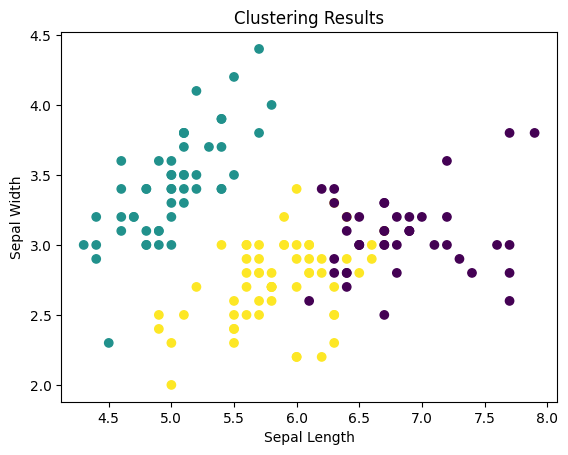

In [62]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Inicializar Spark
spark = SparkSession.builder.getOrCreate()

# Leer datos
data = spark.read.csv("data/iris.csv", inferSchema=True, header=True)

# Seleccionar características para clustering
feature_cols = ['sepal_length', 'sepal_width', 'petal_length']
vec_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
cluster_data = vec_assembler.transform(data)

# Realizar clustering (ajustar modelo y predecir)
kmeans = KMeans(featuresCol="features", k=3)
model = kmeans.fit(cluster_data)
predictions = model.transform(cluster_data)

# Visualizar los resultados del clustering
pd_predictions = predictions.select("sepal_length", "sepal_width", "petal_length", "prediction").toPandas()
plt.scatter(pd_predictions['sepal_length'], pd_predictions['sepal_width'], c=pd_predictions['prediction'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clustering Results')
plt.show()

# Detener la sesión de Spark
spark.stop()


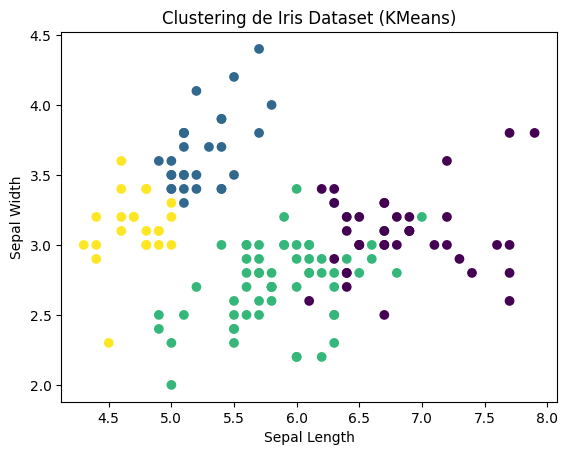

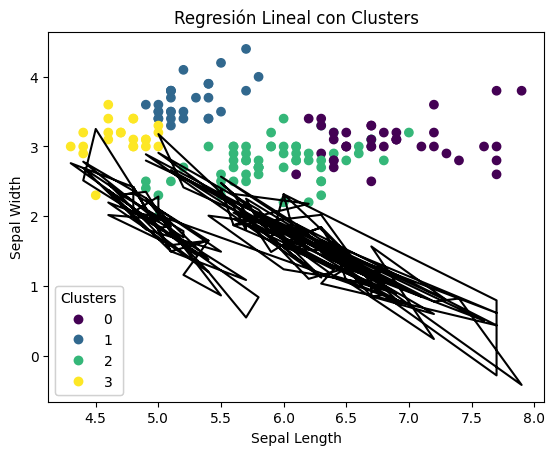

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.regression import LinearRegression

# Crear una sesión de Spark
spark = SparkSession.builder.getOrCreate()

# Crear el DataFrame desde el archivo CSV
datos = spark.read.csv("data/iris.csv", inferSchema="true", header="true")

# Seleccionar las columnas relevantes
input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
final_data = assembler.transform(datos)

# Realizar clustering con KMeans
kmeas = KMeans(featuresCol="features", k=4)
model = kmeas.fit(final_data)
predictions = model.transform(final_data)

# Renombrar la columna "prediction" para evitar conflictos
predictions = predictions.withColumnRenamed("prediction", "cluster")

# Visualización de los resultados del clustering
predictions_pd = predictions.select("sepal_length", "sepal_width", "petal_length", "petal_width", "cluster").toPandas()
plt.scatter(predictions_pd["sepal_length"], predictions_pd["sepal_width"], c=predictions_pd["cluster"], cmap="viridis")
plt.title('Clustering de Iris Dataset (KMeans)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Realizar regresión lineal con los clusters
lr = LinearRegression(featuresCol="features", labelCol="cluster")
lr_model = lr.fit(predictions.select("features", "cluster"))
regression_predictions = lr_model.transform(predictions)

# Visualización de la regresión lineal con los clusters
fig, ax = plt.subplots()
scatter = ax.scatter(predictions_pd["sepal_length"], predictions_pd["sepal_width"], c=predictions_pd["cluster"], cmap="viridis")
x = predictions_pd["sepal_length"]
y = predictions_pd["sepal_width"]
fit = lr_model.coefficients[0] * x + lr_model.coefficients[1] * y + lr_model.intercept
ax.plot(x, fit, color='black')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Regresión Lineal con Clusters')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

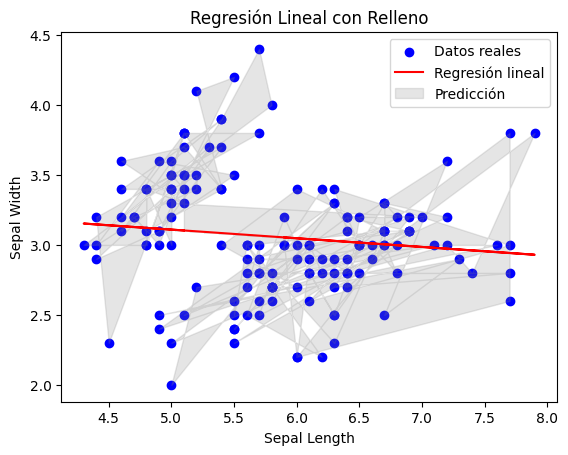

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supongamos que 'regression_data' es un DataFrame de Spark
# Convertir los resultados a un DataFrame de Pandas para la visualización
predictions_pd = predictions.select("sepal_length", "sepal_width", "prediction").toPandas()

# Visualizar los datos y la línea de regresión
fig, ax = plt.subplots()

# Dibujar puntos de datos
ax.scatter(predictions_pd["sepal_length"], predictions_pd["sepal_width"], label="Datos reales", color='blue')

# Dibujar la línea de regresión
ax.plot(predictions_pd["sepal_length"], predictions_pd["prediction"], label="Regresión lineal", color='red')

# Rellenar entre la línea de regresión y los datos reales
ax.fill_between(predictions_pd["sepal_length"], predictions_pd["sepal_width"], predictions_pd["prediction"], color='gray', alpha=0.2, label='Predicción')

# Etiquetas y leyenda
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Regresión Lineal con Relleno')
ax.legend()

# Mostrar el gráfico
plt.show()



IllegalArgumentException: requirement failed: Column prediction already exists.

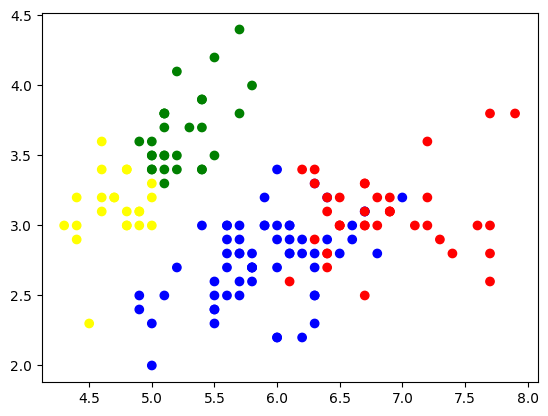

In [47]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
import pandas as pd


# Combina las características en una sola columna
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
final_data = assembler.transform(datos)

# Realiza el clustering
kmeans = KMeans(featuresCol="features", k=4)
model = kmeans.fit(final_data)
predictions = model.transform(final_data)

# Asigna colores a cada cluster
color_mapping = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'yellow'
}

# Convierte los datos a un formato compatible con matplotlib
pd_predictions = predictions.toPandas()

# Agrega la columna de colores
pd_predictions['color'] = pd_predictions['prediction'].map(color_mapping)

# Crea el gráfico de dispersión con colores por cluster
plt.scatter(pd_predictions['sepal_length'], pd_predictions['sepal_width'], c=pd_predictions['color'])

# Muestra la línea de regresión lineal
lr = LinearRegression(featuresCol="features", labelCol="prediction")
lr_model = lr.fit(predictions)
m = lr_model.coefficients[0]
b = lr_model.intercept
plt.plot(pd_predictions['sepal_length'], m * pd_predictions['sepal_length'] + b, color='black')

plt.show()